In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from scipy import stats
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


import seaborn as sns


<h1>Dataframe preparations</h1>

In [362]:
merged_df = pd.read_csv('/Users/rgu/Desktop/UROPs/UROP4/repo/dataframes/final505.csv')

In [305]:
display(merged_df)

,song_name,genre,speaker_id,dry_weight,weight0,weight1,weight2,water_loss1,water_loss2,total_water_loss,...,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,chroma_stft_mean,chroma_stft_var
0,blues.00000.wav,blues,1,1.6970,2.3791,2.3622,2.3454,0.0169,0.0168,0.0337,...,1784.165850,1.297741e+05,2002.449060,85882.76132,3805.839606,9.015054e+05,0.083045,0.000767,0.350088,0.088757
1,blues.00000.wav,blues,2,2.2398,3.0993,3.0800,3.0604,0.0193,0.0196,0.0389,...,1784.165850,1.297741e+05,2002.449060,85882.76132,3805.839606,9.015054e+05,0.083045,0.000767,0.350088,0.088757
2,blues.00001.wav,blues,1,2.0938,2.9459,2.9327,2.9131,0.0132,0.0196,0.0328,...,1530.176679,3.758501e+05,2039.036516,213843.75550,3550.522098,2.977893e+06,0.056040,0.001448,0.340914,0.094980
3,blues.00001.wav,blues,2,1.7753,2.5336,2.5183,2.4888,0.0153,0.0295,0.0448,...,1530.176679,3.758501e+05,2039.036516,213843.75550,3550.522098,2.977893e+06,0.056040,0.001448,0.340914,0.094980
4,blues.00002.wav,blues,1,1.9536,2.7848,2.7713,2.7591,0.0135,0.0122,0.0257,...,1552.811865,1.564676e+05,1747.702312,76254.19226,3042.260232,7.840345e+05,0.076291,0.001007,0.363637,0.085275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,rock.00048.wav,rock,2,1.6663,2.5072,2.4905,2.4763,0.0167,0.0142,0.0309,...,1646.212074,1.182595e+05,1700.799670,53274.51547,3183.841459,5.062808e+05,0.085253,0.000780,0.321645,0.081702
1006,rock.00049.wav,rock,1,1.3199,1.9942,1.9813,1.9713,0.0129,0.0100,0.0229,...,2077.942607,1.216625e+06,2333.872696,694784.81150,4495.809731,6.649790e+06,0.091334,0.002918,0.396285,0.077750
1007,rock.00049.wav,rock,2,1.8025,2.6722,2.6558,2.6467,0.0164,0.0091,0.0255,...,2077.942607,1.216625e+06,2333.872696,694784.81150,4495.809731,6.649790e+06,0.091334,0.002918,0.396285,0.077750
1008,rock.00050.wav,rock,1,1.4875,2.1825,2.1689,2.1586,0.0136,0.0103,0.0239,...,1721.088460,7.007705e+05,2312.314590,366475.40300,3811.160455,3.938340e+06,0.053303,0.001456,0.394481,0.089190


<h1>Clustering</h1>

In [306]:
#determine the colors of the points
colormap = {'blues': 'blue', 
          'classical': 'brown', 
          'country': 'orange', 
          'disco': 'purple', 
          'hiphop': 'skyblue', 
          'jazz': 'khaki', 
          'metal': 'black', 
          'pop': 'deeppink', 
          'reggae': 'green', 
          'rock': 'red'}

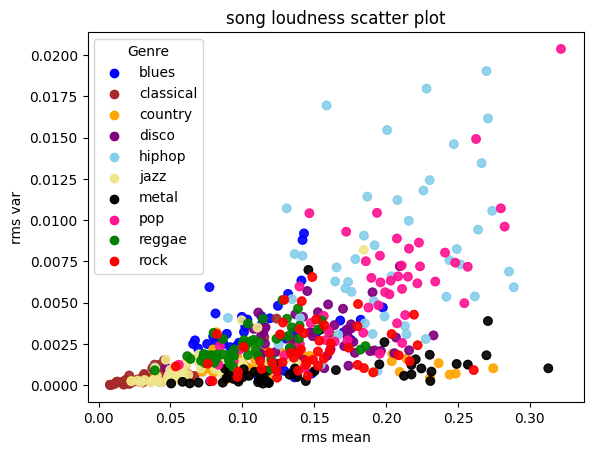

In [308]:
#plot the songs by RMS amplitude mean and variance as the axes. The points will be color coded by genre
x = merged_df['rms_mean']
y = merged_df['rms_var']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('rms mean')
plt.ylabel('rms var')
plt.title('song loudness scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre")

plt.show()


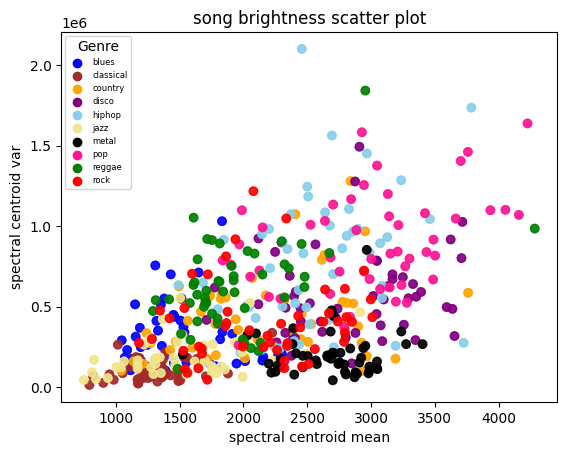

In [377]:
#plot the songs by spectral centroid mean and variance as the axes. The points will be color coded by genre
x = merged_df['spectral_centroid_mean']
y = merged_df['spectral_centroid_var']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('spectral centroid mean')
plt.ylabel('spectral centroid var')
plt.title('song brightness scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre", fontsize="6")

plt.show()

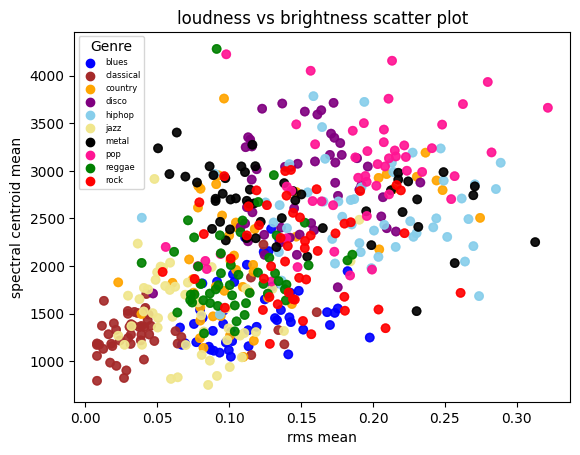

In [311]:
#plot the songs by RMS amplitude mean and spectral centroid as the axes. The points will be color coded by genre
x = merged_df['rms_mean']
y = merged_df['spectral_centroid_mean']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('rms mean')
plt.ylabel('spectral centroid mean')
plt.title('loudness vs brightness scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre", fontsize="6")

plt.show()

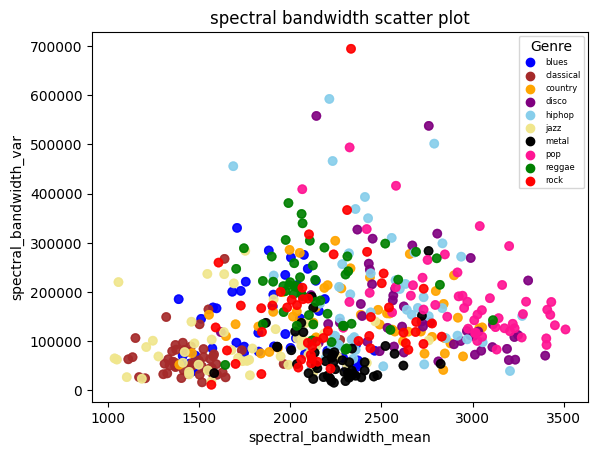

In [376]:
x = merged_df['spectral_bandwidth_mean']
y = merged_df['spectral_bandwidth_var']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('spectral_bandwidth_mean')
plt.ylabel('spectral_bandwidth_var')
plt.title('spectral bandwidth scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre", fontsize="6")
plt.show()

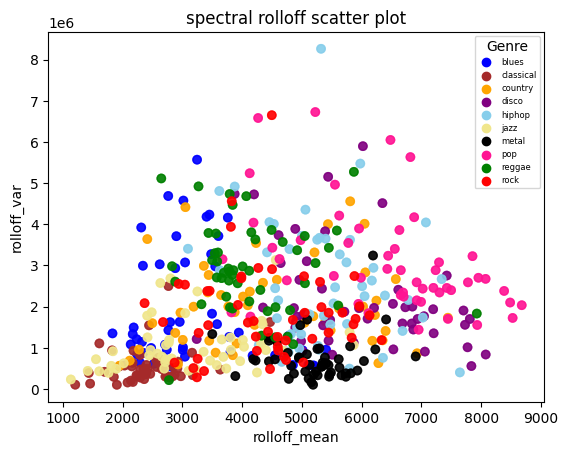

In [378]:
x = merged_df['rolloff_mean']
y = merged_df['rolloff_var']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('rolloff_mean')
plt.ylabel('rolloff_var')
plt.title('spectral rolloff scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre", fontsize="6")
plt.show()

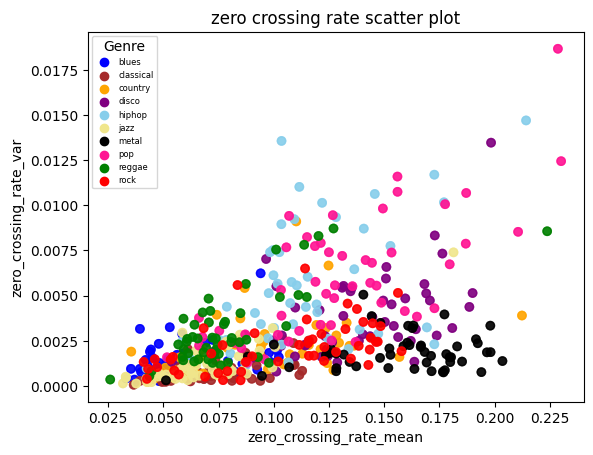

In [379]:

x = merged_df['zero_crossing_rate_mean']
y = merged_df['zero_crossing_rate_var']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('zero_crossing_rate_mean')
plt.ylabel('zero_crossing_rate_var')
plt.title('zero crossing rate scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre", fontsize="6")
plt.show()

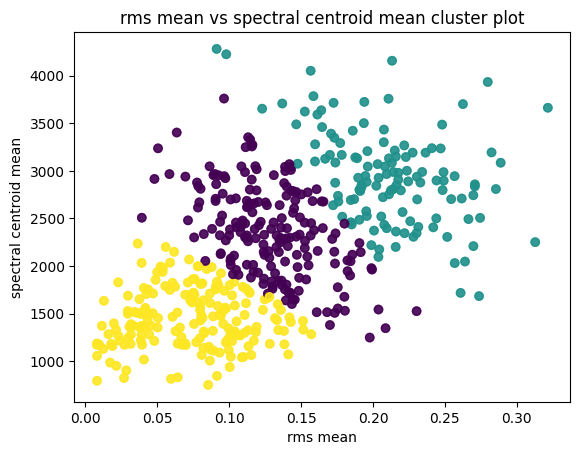

In [312]:
#Cluster plot: rms amplitude mean vs spectral centroid mean

features = merged_df[['rms_mean', 'spectral_centroid_mean']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_features)

plt.scatter(merged_df['rms_mean'], merged_df['spectral_centroid_mean'], c=clusters, cmap='viridis', alpha=0.7) #viridis is a type of colormap

plt.xlabel('rms mean')
plt.ylabel('spectral centroid mean')
plt.title("rms mean vs spectral centroid mean cluster plot")

plt.show()

<h1>Assumptions Testing</h1>

In [313]:
#Shapiro-Wilk Test to check for normality
#residuals = model_test.resid

stat, p_value = stats.shapiro(merged_df['total_water_loss'])

print("Shapiro-Wilk Test Statistic:", stat)
print("P-Value:", p_value)

if p_value > 0.05:
    print("The data is normally distributed (fail to reject H₀).")
else:
    print("The data is not normally distributed (reject H₀).")

Shapiro-Wilk Test Statistic: 0.9761261864085752
P-Value: 7.874178903555918e-12
The data is not normally distributed (reject H₀).


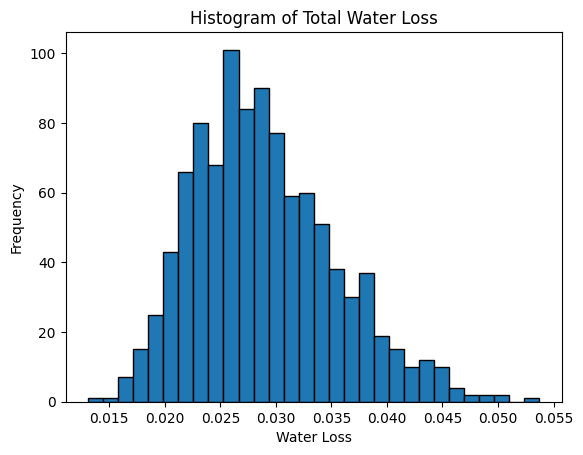

In [464]:
plt.hist(merged_df['total_water_loss'], bins=30, edgecolor='black')
plt.title('Histogram of Total Water Loss')
plt.xlabel('Water Loss')
plt.ylabel('Frequency')
plt.show()

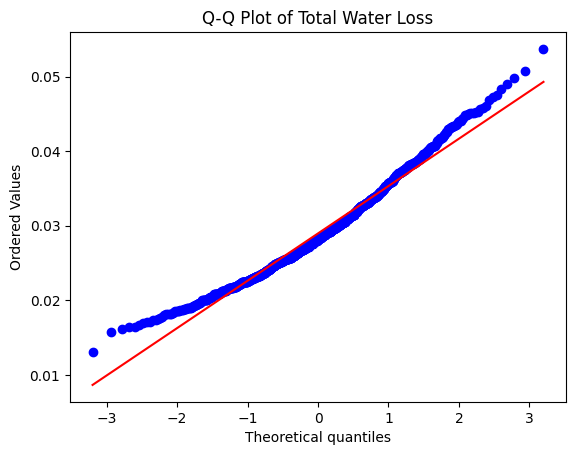

In [315]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(merged_df['total_water_loss'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Water Loss')
plt.show()


In [316]:
genres = merged_df['genre'].unique()  #get the unique genre names
groups = [merged_df[merged_df['genre'] == genre]['total_water_loss'] for genre in genres]
stat, p_value = stats.levene(*groups)
print("Levene's Test Statistic:", stat)
print("P-Value:", p_value)

if p_value > 0.05:
    print("Variances are equal across groups (fail to reject H₀).")
else:
    print("Variances are significantly different across groups (reject H₀).")

Levene's Test Statistic: 2.6753861233026157
P-Value: 0.004501396519727931
Variances are significantly different across groups (reject H₀).


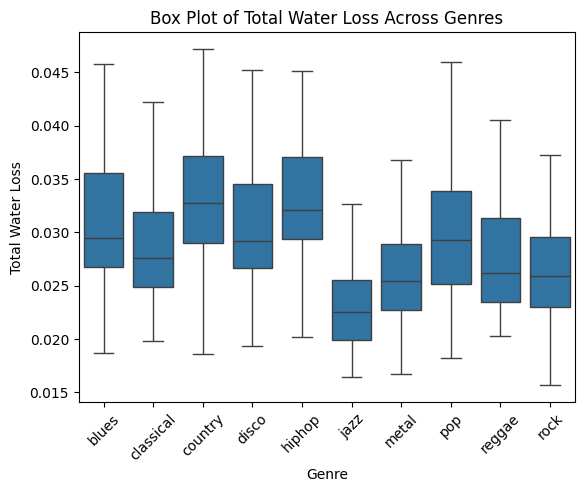

In [317]:
sns.boxplot(x='genre', y='total_water_loss', data=merged_df, showfliers=False)
plt.title('Box Plot of Total Water Loss Across Genres')
plt.xlabel('Genre')
plt.ylabel('Total Water Loss')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#depricated, but was used to remove datapoint outliers that were 3 std away from the mean. in this case we used in terms of residuals

# std_deviation = np.std(residuals)
# mean_residual = np.mean(residuals)
# threshold = 3  # This can be adjusted

# outliers = merged_df[np.abs(residuals) > (mean_residual + threshold * std_deviation)]
# print("Outliers:")
# print(outliers)

In [ ]:
for variable in ['rms_mean', 'rms_var', 
                  'spectral_centroid_mean', 'spectral_centroid_var', 
                  'spectral_bandwidth_mean', 'spectral_bandwidth_var',
                  'zero_crossing_rate_mean', 'zero_crossing_rate_var',
                  'chroma_stft_mean', 'chroma_stft_var',
                  'rolloff_mean', 'rolloff_var', 'tempo']:
    stat, p_value = stats.shapiro(merged_df[variable])

    print(stat, p_value)

    if p_value > 0.05:
        print("The data is normally distributed (fail to reject H₀).")
    else:
        print("The data is not normally distributed (reject H₀).")

    plt.hist(merged_df[variable], bins=30, edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Frequency')
    plt.show()

<h1>Welch's ANOVA</h1>



<h3>Independent: song_name,  Dependent: total 
water loss </h3>

In [585]:
welch_anova_results = pg.welch_anova(dv='total_water_loss', between='genre', data=merged_df)

print(welch_anova_results)  

  Source  ddof1       ddof2         F         p-unc       np2
0  genre      9  406.881629  41.02769  7.099962e-52  0.224306


<h1>Spearman's Rank Correlation</h1>

In [322]:
corr_matrix = merged_df[['rms_mean', 'rms_var', 
                  'spectral_centroid_mean', 'spectral_centroid_var', 
                  'spectral_bandwidth_mean', 'spectral_bandwidth_var',
                  'zero_crossing_rate_mean', 'zero_crossing_rate_var',
                  'rolloff_mean', 'rolloff_var',
                   'total_water_loss']].corr(method='spearman') # Calculate Spearman correlation

print(corr_matrix)

                         rms_mean   rms_var  spectral_centroid_mean  \
rms_mean                 1.000000  0.619877                0.573844   
rms_var                  0.619877  1.000000                0.256805   
spectral_centroid_mean   0.573844  0.256805                1.000000   
spectral_centroid_var    0.362458  0.588044                0.490318   
spectral_bandwidth_mean  0.591558  0.355861                0.911984   
spectral_bandwidth_var   0.152783  0.456038                0.067559   
zero_crossing_rate_mean  0.428531  0.081865                0.899909   
zero_crossing_rate_var   0.384894  0.506123                0.705721   
rolloff_mean             0.598446  0.294247                0.984141   
rolloff_var              0.247073  0.534813                0.221163   
total_water_loss         0.339729  0.283951                0.142810   

                         spectral_centroid_var  spectral_bandwidth_mean  \
rms_mean                              0.362458                 0.591558 

In [586]:
corr_matrix = merged_df[['rms_mean', 
                  'spectral_centroid_mean', 
                  'spectral_bandwidth_mean', 
                  'zero_crossing_rate_mean', 
                  'rolloff_mean',
                   'total_water_loss']].corr(method='spearman') # Calculate Spearman correlation

print(corr_matrix)

                         rms_mean  spectral_centroid_mean  \
rms_mean                 1.000000                0.573844   
spectral_centroid_mean   0.573844                1.000000   
spectral_bandwidth_mean  0.591558                0.911984   
zero_crossing_rate_mean  0.428531                0.899909   
rolloff_mean             0.598446                0.984141   
total_water_loss         0.339729                0.142810   

                         spectral_bandwidth_mean  zero_crossing_rate_mean  \
rms_mean                                0.591558                 0.428531   
spectral_centroid_mean                  0.911984                 0.899909   
spectral_bandwidth_mean                 1.000000                 0.680400   
zero_crossing_rate_mean                 0.680400                 1.000000   
rolloff_mean                            0.953614                 0.830005   
total_water_loss                        0.214151                 0.046959   

                         rolloff

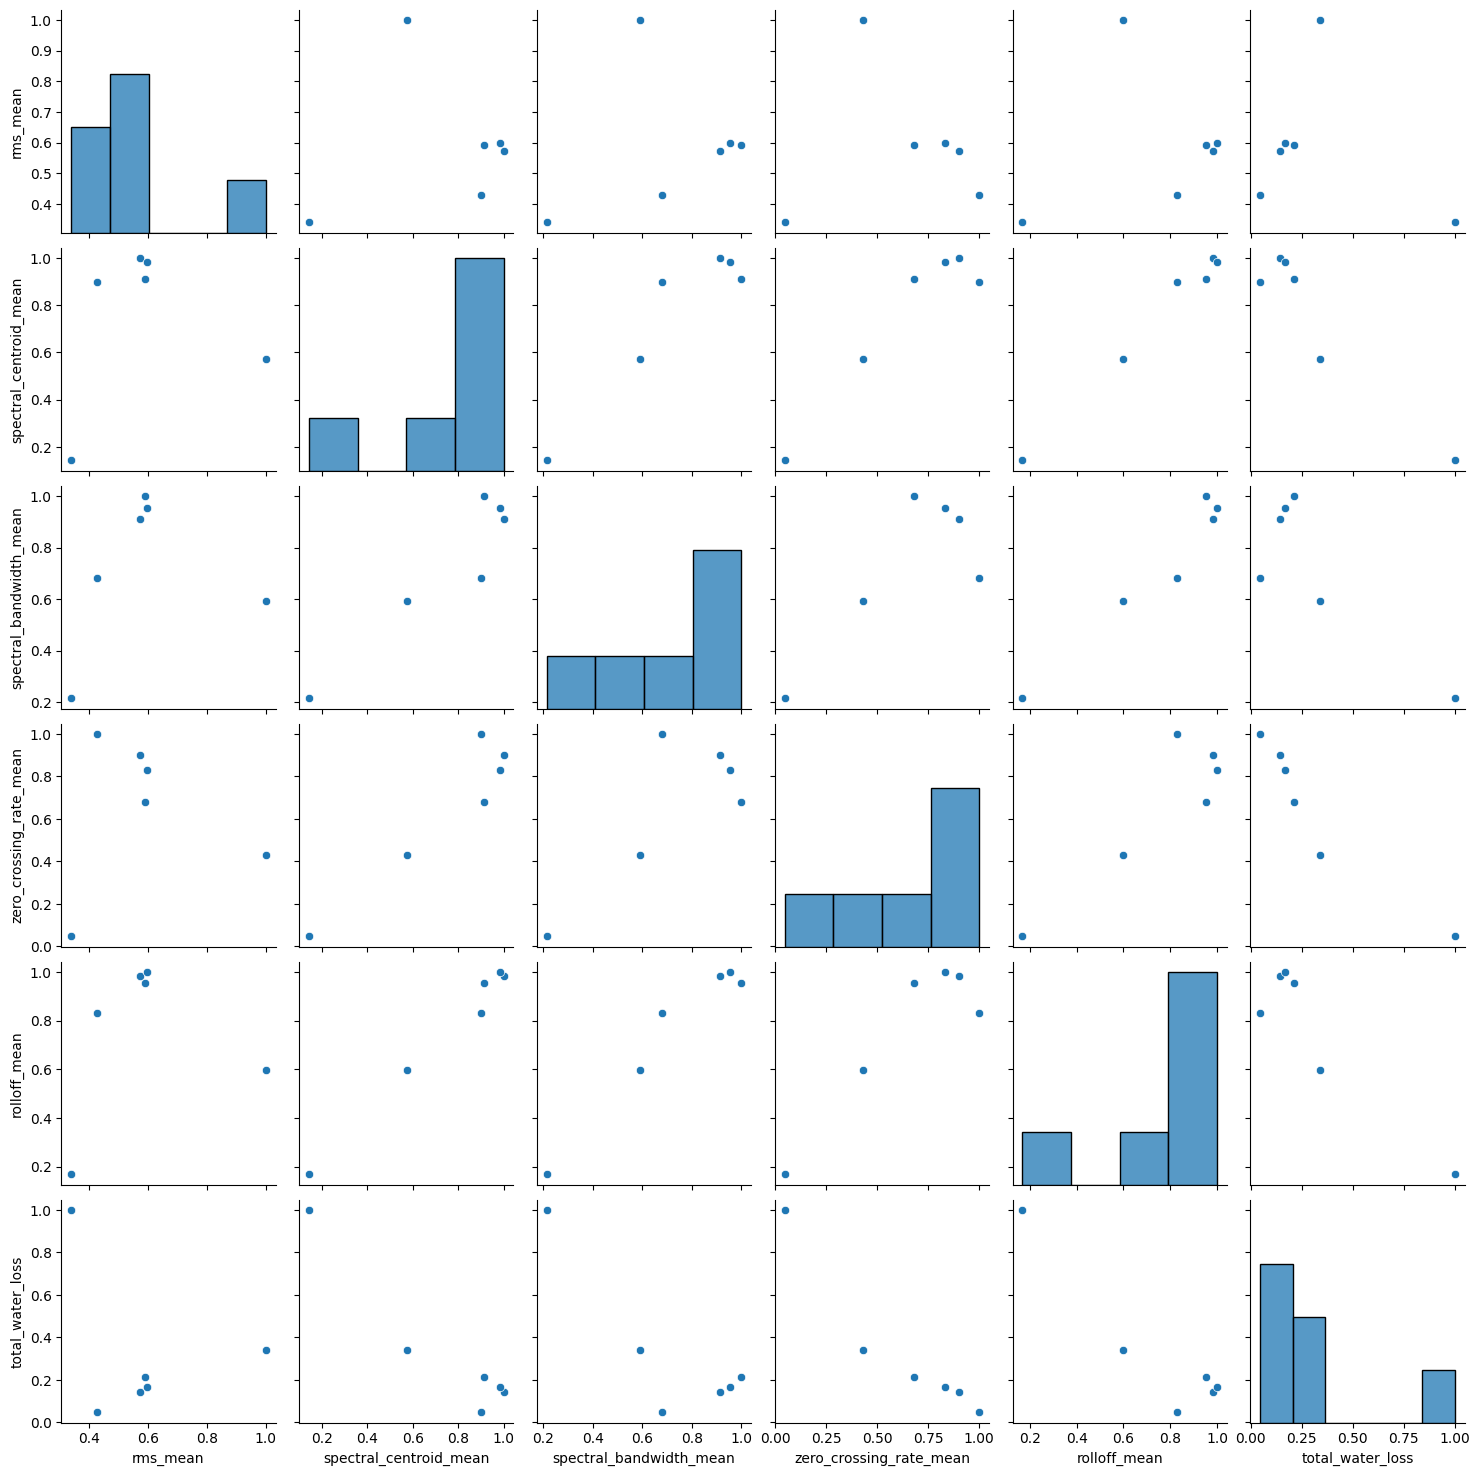

In [587]:
sns.pairplot(corr_matrix)
plt.show()

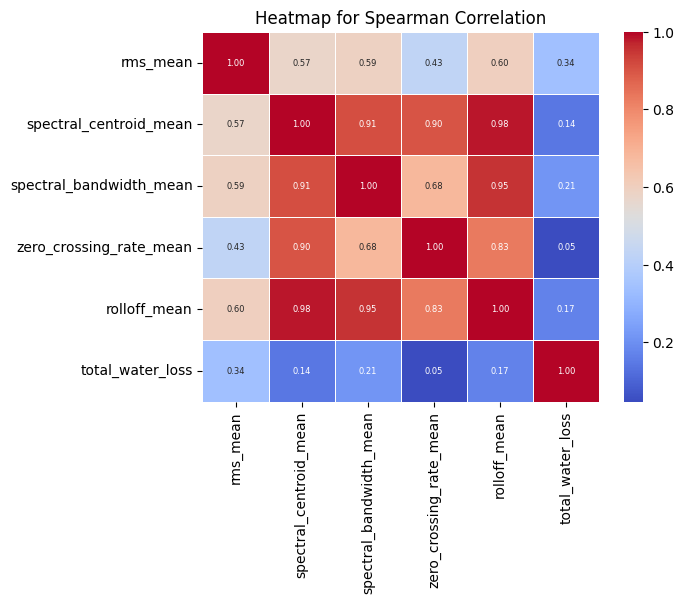

In [588]:
#plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f', linewidths = 0.5, annot_kws={"size": 6})
plt.title('Heatmap for Spearman Correlation')
plt.show()

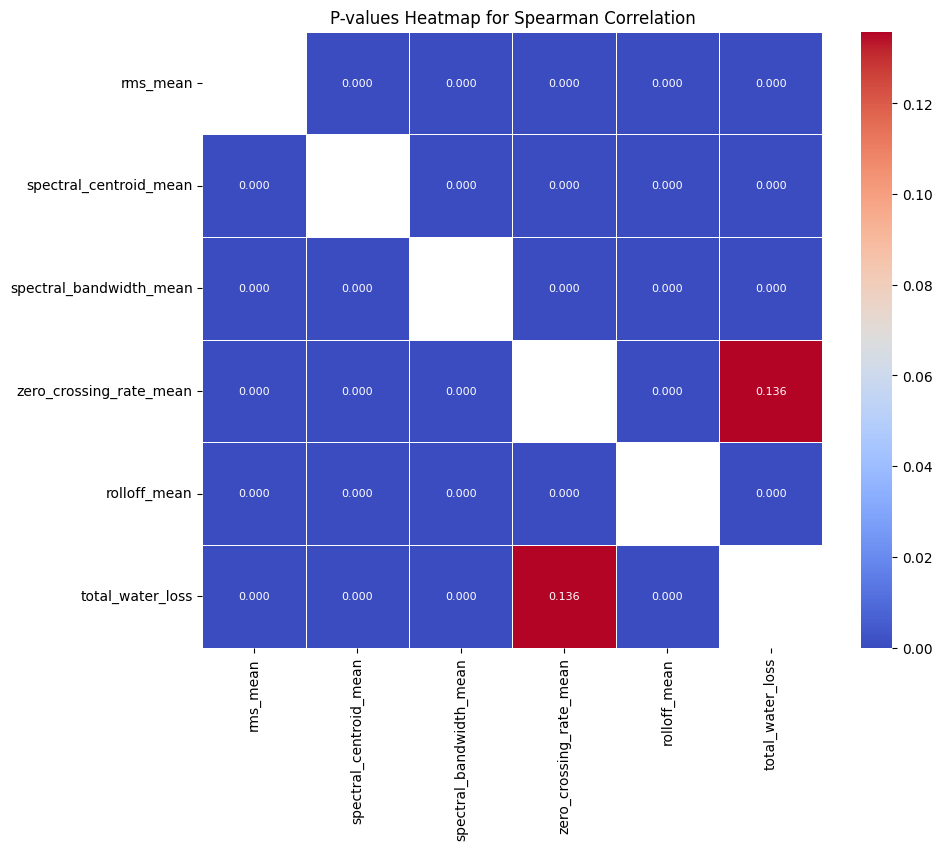

In [590]:
# data = merged_df[['rms_mean', 'rms_var', 
#                   'spectral_centroid_mean', 'spectral_centroid_var', 
#                   'spectral_bandwidth_mean', 'spectral_bandwidth_var',
#                   'zero_crossing_rate_mean', 'zero_crossing_rate_var',
#                   'rolloff_mean', 'rolloff_var',
#                   'total_water_loss']]

data = merged_df[['rms_mean',
                  'spectral_centroid_mean',
                  'spectral_bandwidth_mean', 
                  'zero_crossing_rate_mean',
                  'rolloff_mean',
                  'total_water_loss']]

p_values = pd.DataFrame(np.zeros((data.shape[1], data.shape[1])), columns=data.columns, index=data.columns)

#compute spearman for each pair of variables, store it in a dataframe
for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2:
            rho, p = stats.spearmanr(data[col1], data[col2])
            p_values.loc[col1, col2] = p
        else:
            p_values.loc[col1, col2] = np.nan  #diagonals should be Nan


plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, annot_kws={"size": 8})
plt.title('P-values Heatmap for Spearman Correlation')
plt.show()

<h1>PCA</h1>

In [591]:
# outputs = merged_df[['rms_mean', 'rms_var', 
#                   'spectral_centroid_mean', 'spectral_centroid_var', 
#                   'spectral_bandwidth_mean', 'spectral_bandwidth_var',
#                   'zero_crossing_rate_mean', 'zero_crossing_rate_var',
#                   'rolloff_mean', 'rolloff_var']]


outputs = merged_df[['rms_mean',
                  'spectral_centroid_mean',
                  'spectral_bandwidth_mean', 
                  'zero_crossing_rate_mean',
                  'rolloff_mean']]

In [592]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(outputs)

In [593]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
print(principal_components)

[[-0.84363302  0.31986146]
 [-0.84363302  0.31986146]
 [-1.51115852  0.20554718]
 ...
 [-0.21061359 -0.24208677]
 [-0.8531578   0.81873689]
 [-0.8531578   0.81873689]]


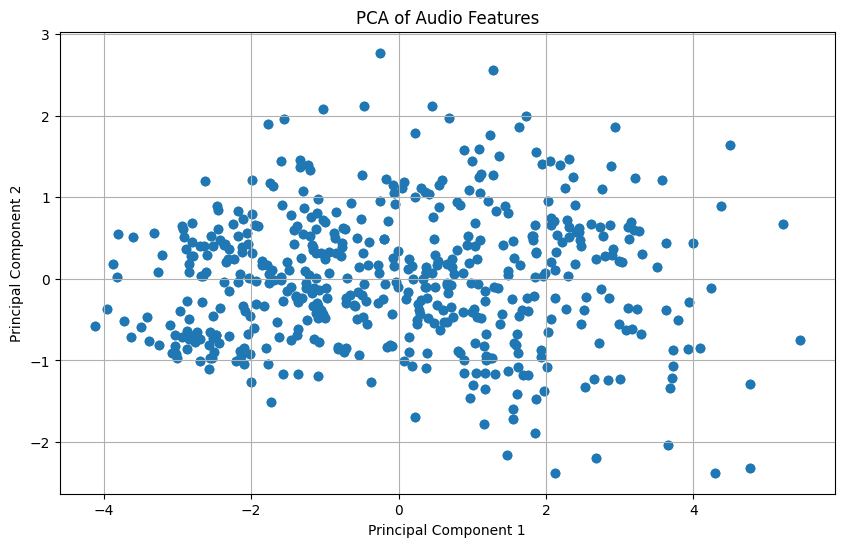

In [594]:
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

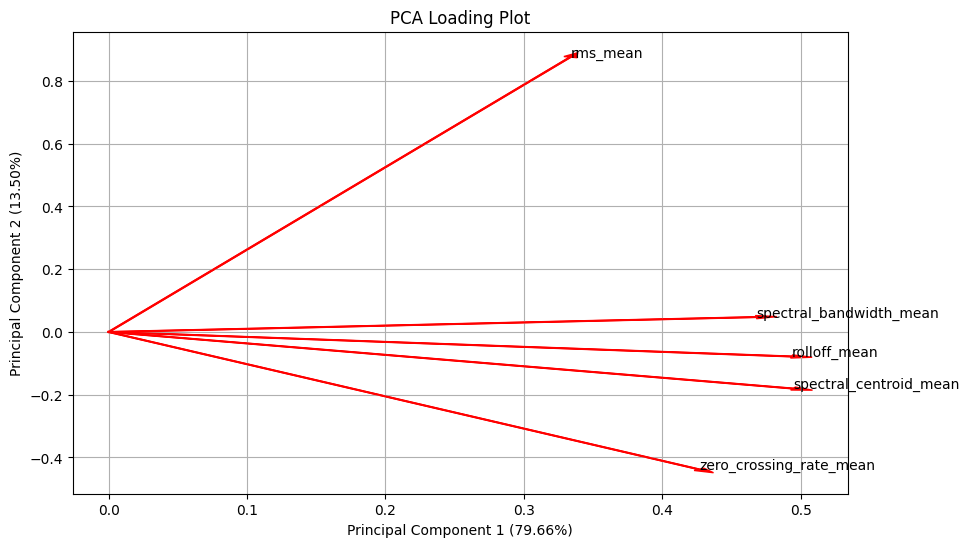

In [596]:
loadings = pca.components_

plt.figure(figsize=(10, 6))
#plt.scatter(loadings[0, :], loadings[1, :], color='red')
for i in range(loadings.shape[1]):
    plt.plot([0, loadings[0, i]], [0, loadings[1, i]], 'red')

# feature_names = ['rms_mean', 'rms_var', 
#                   'spectral_centroid_mean', 'spectral_centroid_var', 
#                   'spectral_bandwidth_mean', 'spectral_bandwidth_var',
#                   'zero_crossing_rate_mean', 'zero_crossing_rate_var',
#                   'rolloff_mean', 'rolloff_var']

feature_names = ['rms_mean',
                  'spectral_centroid_mean',
                  'spectral_bandwidth_mean', 
                  'zero_crossing_rate_mean',
                  'rolloff_mean']

explained_variance_ratios = pca.explained_variance_ratio_

for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], color = 'red', head_width=0.01)
    plt.text(loadings[0, i], loadings[1, i], feature)


plt.title('PCA Loading Plot')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratios[0]:.2%})')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratios[1]:.2%})')
plt.grid(True)
plt.show()

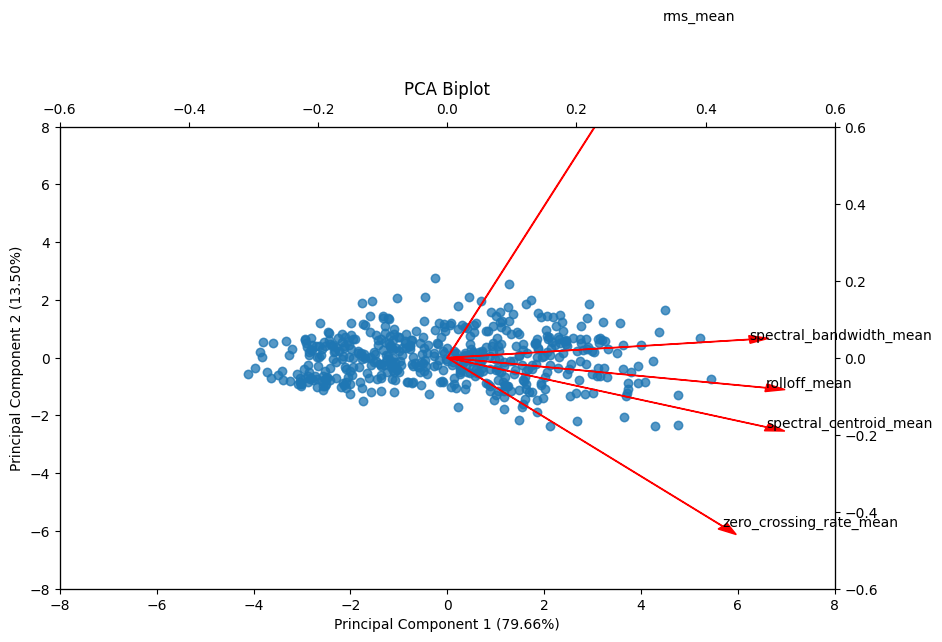

In [598]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
ax1.set_xlabel(f'Principal Component 1 ({explained_variance_ratios[0]:.2%})')
ax1.set_ylabel(f'Principal Component 2 ({explained_variance_ratios[1]:.2%})')
ax1.set_xlim(-8, 8)
ax1.set_ylim(-8, 8)
ax1.set_title('PCA Biplot')

ax2 = ax1.twinx().twiny() 
ax2.set_xlim(-0.6, 0.6)
ax2.set_ylim(-0.6, 0.6)


for i, feature in enumerate(feature_names):
    ax2.arrow(0, 0, loadings[0, i], loadings[1, i], color = 'red', head_width=0.02)
    #ax2.arrow(0, 0, loadings[0, i], loadings[0, i], color='red', alpha=0.5, head_width=0.02)
    ax2.text(loadings[0, i], loadings[1, i], feature)

plt.show()

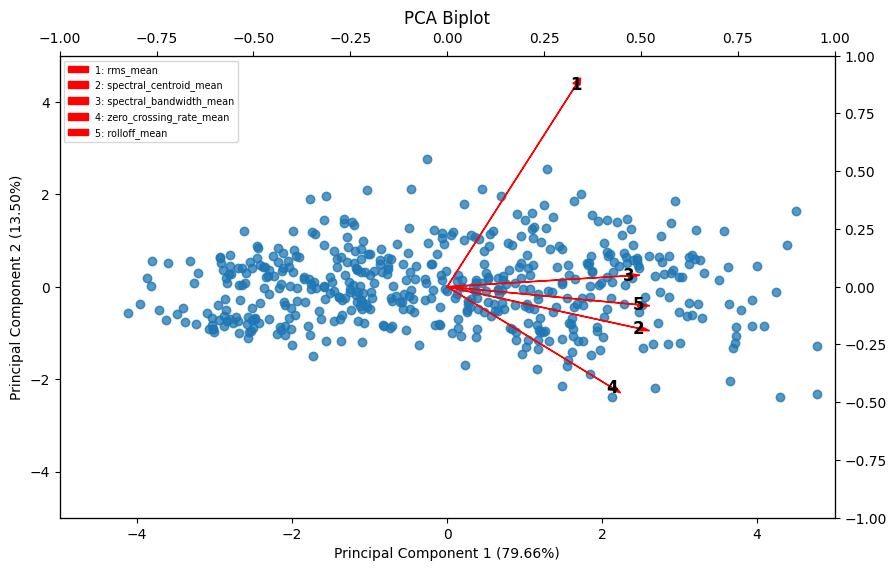

In [602]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the principal components
ax1.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
ax1.set_xlabel(f'Principal Component 1 ({explained_variance_ratios[0]:.2%})')
ax1.set_ylabel(f'Principal Component 2 ({explained_variance_ratios[1]:.2%})')
# ax1.set_xlim(-8, 8)
# ax1.set_ylim(-8, 8)

ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_title('PCA Biplot')

# Adding the twin axes for loadings
ax2 = ax1.twinx().twiny() 
# ax2.set_xlim(-0.6, 0.6) #old
# ax2.set_ylim(-0.6, 0.6)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)

# Create the numerical scale for each feature
feature_numbers = range(1, len(feature_names) + 1)

# Plot the loadings and label them with numbers
for i, (num, feature) in enumerate(zip(feature_numbers, feature_names)):
    ax2.arrow(0, 0, loadings[0, i], loadings[1, i], color='red', head_width=0.02)
    ax2.text(loadings[0, i], loadings[1, i], str(num), color='black', fontweight='bold', fontsize=12, ha='center', va='center')

# Create the legend with the numerical scale and corresponding feature names
legend_labels = [f"{num}: {feature}" for num, feature in zip(feature_numbers, feature_names)]
ax2.legend(legend_labels, loc='upper left', fontsize = 'x-small')

plt.show()


In [423]:
#create pca dataframe
pca_df = pd.DataFrame(principal_components, columns=[f"PCA_{i}" for i in range(1, principal_components.shape[1]+1)])
pca_df['total_water_loss'] = merged_df['total_water_loss']
display(pca_df)

,PCA_1,PCA_2,total_water_loss
0,-1.489873,-0.531727,0.0337
1,-1.489873,-0.531727,0.0389
2,-1.135104,1.591981,0.0328
3,-1.135104,1.591981,0.0448
4,-1.816801,-0.339501,0.0257
...,...,...,...
1005,-2.172097,-0.851224,0.0309
1006,2.287135,5.693795,0.0229
1007,2.287135,5.693795,0.0255
1008,0.369323,3.082584,0.0239


In [468]:
pca_df.to_csv('/Users/rgu/Desktop/UROPs/UROP4/repo/dataframes/pca_points')

In [603]:
#pca correlation matrix
correlation_matrix = np.dot(scaled_features.T, principal_components) / (scaled_features.shape[0] - 1)



correlation_matrix_df = pd.DataFrame(correlation_matrix, index=feature_names, columns=['PC1', 'PC2'])

correlation_matrix_df = correlation_matrix_df.reset_index()
correlation_matrix_df.rename(columns={'index': 'Variable'}, inplace=True)


display(correlation_matrix_df)


,Variable,PC1,PC2
0,rms_mean,1.329881,0.591774
1,spectral_centroid_mean,1.971379,-0.121782
2,spectral_bandwidth_mean,1.865164,0.032052
3,zero_crossing_rate_mean,1.700527,-0.295751
4,rolloff_mean,1.967323,-0.052743


In [469]:
correlation_matrix_df.to_csv('/Users/rgu/Desktop/UROPs/UROP4/repo/dataframes/pca_correlation')

<h1>OLS Regression and VIFs</h1>

In [ ]:
from itertools import combinations

In [635]:

comb = list(combinations(['rms_mean', 
                  'spectral_centroid_mean', 
                  'spectral_bandwidth_mean', 
                  'zero_crossing_rate_mean', 
                  'rolloff_mean'], r=2))
print(comb)

[('rms_mean', 'spectral_centroid_mean'), ('rms_mean', 'spectral_bandwidth_mean'), ('rms_mean', 'zero_crossing_rate_mean'), ('rms_mean', 'rolloff_mean'), ('spectral_centroid_mean', 'spectral_bandwidth_mean'), ('spectral_centroid_mean', 'zero_crossing_rate_mean'), ('spectral_centroid_mean', 'rolloff_mean'), ('spectral_bandwidth_mean', 'zero_crossing_rate_mean'), ('spectral_bandwidth_mean', 'rolloff_mean'), ('zero_crossing_rate_mean', 'rolloff_mean')]


In [636]:
for i in comb:
    print(i)

('rms_mean', 'spectral_centroid_mean')
('rms_mean', 'spectral_bandwidth_mean')
('rms_mean', 'zero_crossing_rate_mean')
('rms_mean', 'rolloff_mean')
('spectral_centroid_mean', 'spectral_bandwidth_mean')
('spectral_centroid_mean', 'zero_crossing_rate_mean')
('spectral_centroid_mean', 'rolloff_mean')
('spectral_bandwidth_mean', 'zero_crossing_rate_mean')
('spectral_bandwidth_mean', 'rolloff_mean')
('zero_crossing_rate_mean', 'rolloff_mean')


In [667]:
X = merged_df[['rms_mean', 
               'rolloff_mean'
               #'zero_crossing_rate_mean', 
               ]]

y = merged_df['total_water_loss']

            #    'spectral_centroid_mean',
            #    'spectral_bandwidth_mean',
            #    'zero_crossing_rate_mean', 
            #    'rolloff_mean',

In [668]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       total_water_loss   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     70.43
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           2.36e-29
Time:                        17:17:40   Log-Likelihood:                 3734.0
No. Observations:                1010   AIC:                            -7462.
Df Residuals:                    1007   BIC:                            -7447.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0251      0.001     43.803   

In [649]:
import statsmodels.stats.api as sms
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)

# bp_test returns four values: Lagrange multiplier statistic, p-value, f-value, and f p-value
print(f"Breusch-Pagan test p-value: {bp_test[1]}")

Breusch-Pagan test p-value: 0.014048035430372974


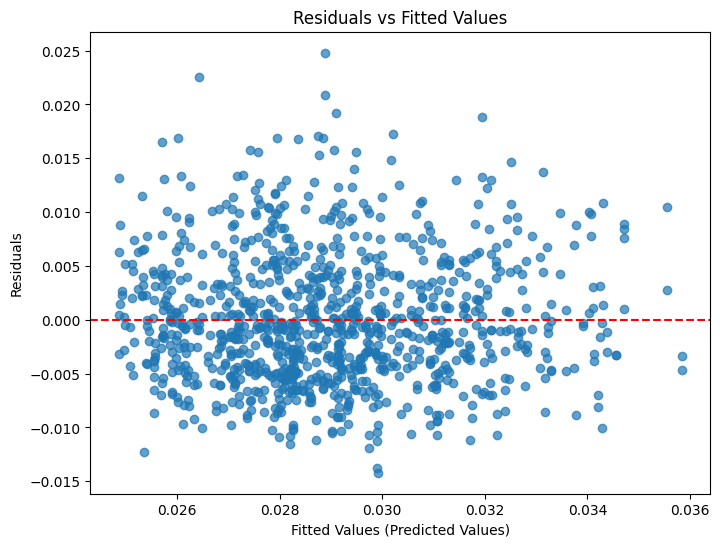

In [669]:
fitted_values = model.fittedvalues  # Fitted (predicted) values
residuals = model.resid  # Residuals from the model

# Plotting residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
residuals = y_test - y_pred

#plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [640]:
for i in comb:
    X = merged_df[list(i)]
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    display(vif_data)

,Feature,VIF
0,rms_mean,7.111224
1,spectral_centroid_mean,7.111224


,Feature,VIF
0,rms_mean,7.53
1,spectral_bandwidth_mean,7.53


,Feature,VIF
0,rms_mean,4.875336
1,zero_crossing_rate_mean,4.875336


,Feature,VIF
0,rms_mean,7.469603
1,rolloff_mean,7.469603


,Feature,VIF
0,spectral_centroid_mean,47.600724
1,spectral_bandwidth_mean,47.600724


,Feature,VIF
0,spectral_centroid_mean,31.639945
1,zero_crossing_rate_mean,31.639945


,Feature,VIF
0,spectral_centroid_mean,238.948892
1,rolloff_mean,238.948892


,Feature,VIF
0,spectral_bandwidth_mean,11.470038
1,zero_crossing_rate_mean,11.470038


,Feature,VIF
0,spectral_bandwidth_mean,58.796371
1,rolloff_mean,58.796371


,Feature,VIF
0,zero_crossing_rate_mean,18.973949
1,rolloff_mean,18.973949


In [556]:
display(vif_data)

,Feature,VIF
0,rms_mean,7.869562
1,spectral_centroid_mean,51.071865
2,zero_crossing_rate_mean,35.014014


<h1>Ridge Regression</h1>

In [557]:
X = merged_df[['rms_mean', 
               'spectral_centroid_mean', 
               'spectral_bandwidth_mean', 
               'zero_crossing_rate_mean', 
               'rolloff_mean', 
               ]]

y = merged_df['total_water_loss']

In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [559]:
scaler = StandardScaler() #sets mean to 0, var to 1

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [560]:
ridge_reg = Ridge(alpha=25.595479226995334)

#train the model
ridge_reg.fit(X_train_scaled, y_train)


Ridge(alpha=25.595479226995334)

In [561]:
y_pred = ridge_reg.predict(X_test_scaled)


In [562]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 3.2896344800813516e-05
R-squared: 0.1711647408315803


In [563]:
#cross validation for best alpha
param_grid = {'alpha': np.logspace(-3, 3, 50)} 
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

#fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

#get best ridge model
best_ridge = grid_search.best_estimator_

#find best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 25.595479226995334


In [565]:
coefficients = pd.Series(ridge_reg.coef_, index=X.columns)
coefficients_df = coefficients.reset_index()
coefficients_df.columns = ['Variable', 'Coefficient']

display(coefficients_df)


,Variable,Coefficient
0,rms_mean,0.002118
1,spectral_centroid_mean,0.000250
2,spectral_bandwidth_mean,0.000868
3,zero_crossing_rate_mean,-0.001211
4,rolloff_mean,-0.000325


In [566]:
coefficients.to_csv('/Users/rgu/Desktop/UROPs/UROP4/repo/regression_coefficients.csv')

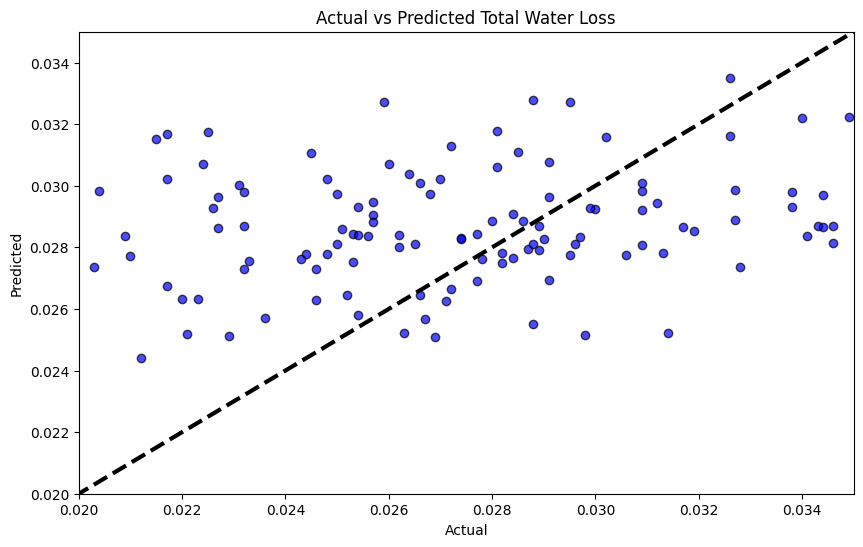

In [571]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)

plt.xlim(0.02, 0.035)
plt.ylim(0.02, 0.035)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Total Water Loss')
plt.show()


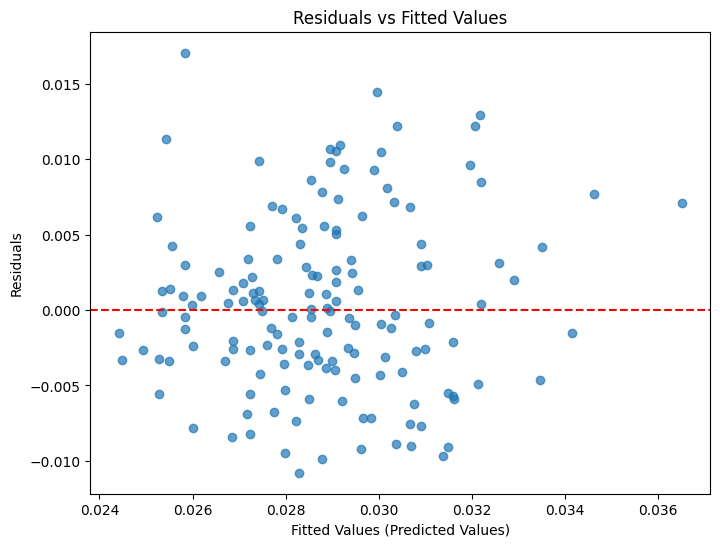

In [373]:
#test for homoscedascity
residuals = y_test - y_pred

#plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

<h1>Recursive Feature Elimination</h1>

In [225]:
raw_df = pd.read_csv("/Users/rgu/Desktop/UROPs/UROP4/repo/dataframes/raw505.csv")

In [230]:
from sklearn.feature_selection import RFE


X = raw_df[['rms_mean', 'rms_var', 
               'spectral_centroid_mean', 'spectral_centroid_var', 
               'spectral_bandwidth_mean', 'spectral_bandwidth_var',
               'zero_crossing_rate_mean', 'zero_crossing_rate_var',
               'chroma_stft_mean', 'chroma_stft_var',
               'rolloff_mean', 'rolloff_var', 'tempo']]

y = raw_df['total_water_loss']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [231]:
#init model
ridge = Ridge(alpha=2.6826957952797246)



In [232]:
param_grid = {'alpha': np.logspace(-3, 3, 50)} 
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

#get best ridge model
best_ridge = grid_search.best_estimator_

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 2.6826957952797246


In [233]:
#set up RFE with the model and specify the number of features you want to select
rfe = RFE(estimator=ridge, n_features_to_select=9)

#and fit it
rfe.fit(X_train_scaled, y_train)

RFE(estimator=Ridge(alpha=2.6826957952797246), n_features_to_select=9)

In [234]:
selected_features = rfe.support_

#get rfe rankings
feature_ranking = rfe.ranking_

rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features,
    'Ranking': feature_ranking
})

print(rfe_results)


                    Feature  Selected  Ranking
0                  rms_mean      True        1
1                   rms_var      True        1
2    spectral_centroid_mean      True        1
3     spectral_centroid_var      True        1
4   spectral_bandwidth_mean      True        1
5    spectral_bandwidth_var      True        1
6   zero_crossing_rate_mean      True        1
7    zero_crossing_rate_var     False        5
8          chroma_stft_mean     False        2
9           chroma_stft_var     False        3
10             rolloff_mean      True        1
11              rolloff_var      True        1
12                    tempo     False        4


<h1>GAM model test</h1>

In [236]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s, f
import matplotlib.pyplot as plt


In [237]:
X = raw_df[['rms_mean', 'rms_var', 
               'spectral_centroid_mean', 'spectral_centroid_var', 
               'spectral_bandwidth_mean', 'spectral_bandwidth_var',
               'zero_crossing_rate_mean', 'zero_crossing_rate_var',
               'rolloff_mean', 'rolloff_var']]

y = raw_df['total_water_loss']

In [238]:
#define the model using smoothing splines for continuous predictors
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + s(5) +
    s(6) + s(7) + s(8) + s(9)
).fit(X, y)

print(gam.summary())


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    109.2622
Link Function:                     IdentityLink Log Likelihood:                             -14593754.7908
Number of Samples:                         1010 AIC:                                          29187730.106
                                                AICc:                                        29187757.4065
                                                GCV:                                                   0.0
                                                Scale:                                                 0.0
                                                Pseudo R-Squared:                                   0.3298
Feature Function                  Lam

/var/folders/34/1ttg_lbn35dc4rbjqq8z0rth0000gn/T/ipykernel_1446/30656259.py:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


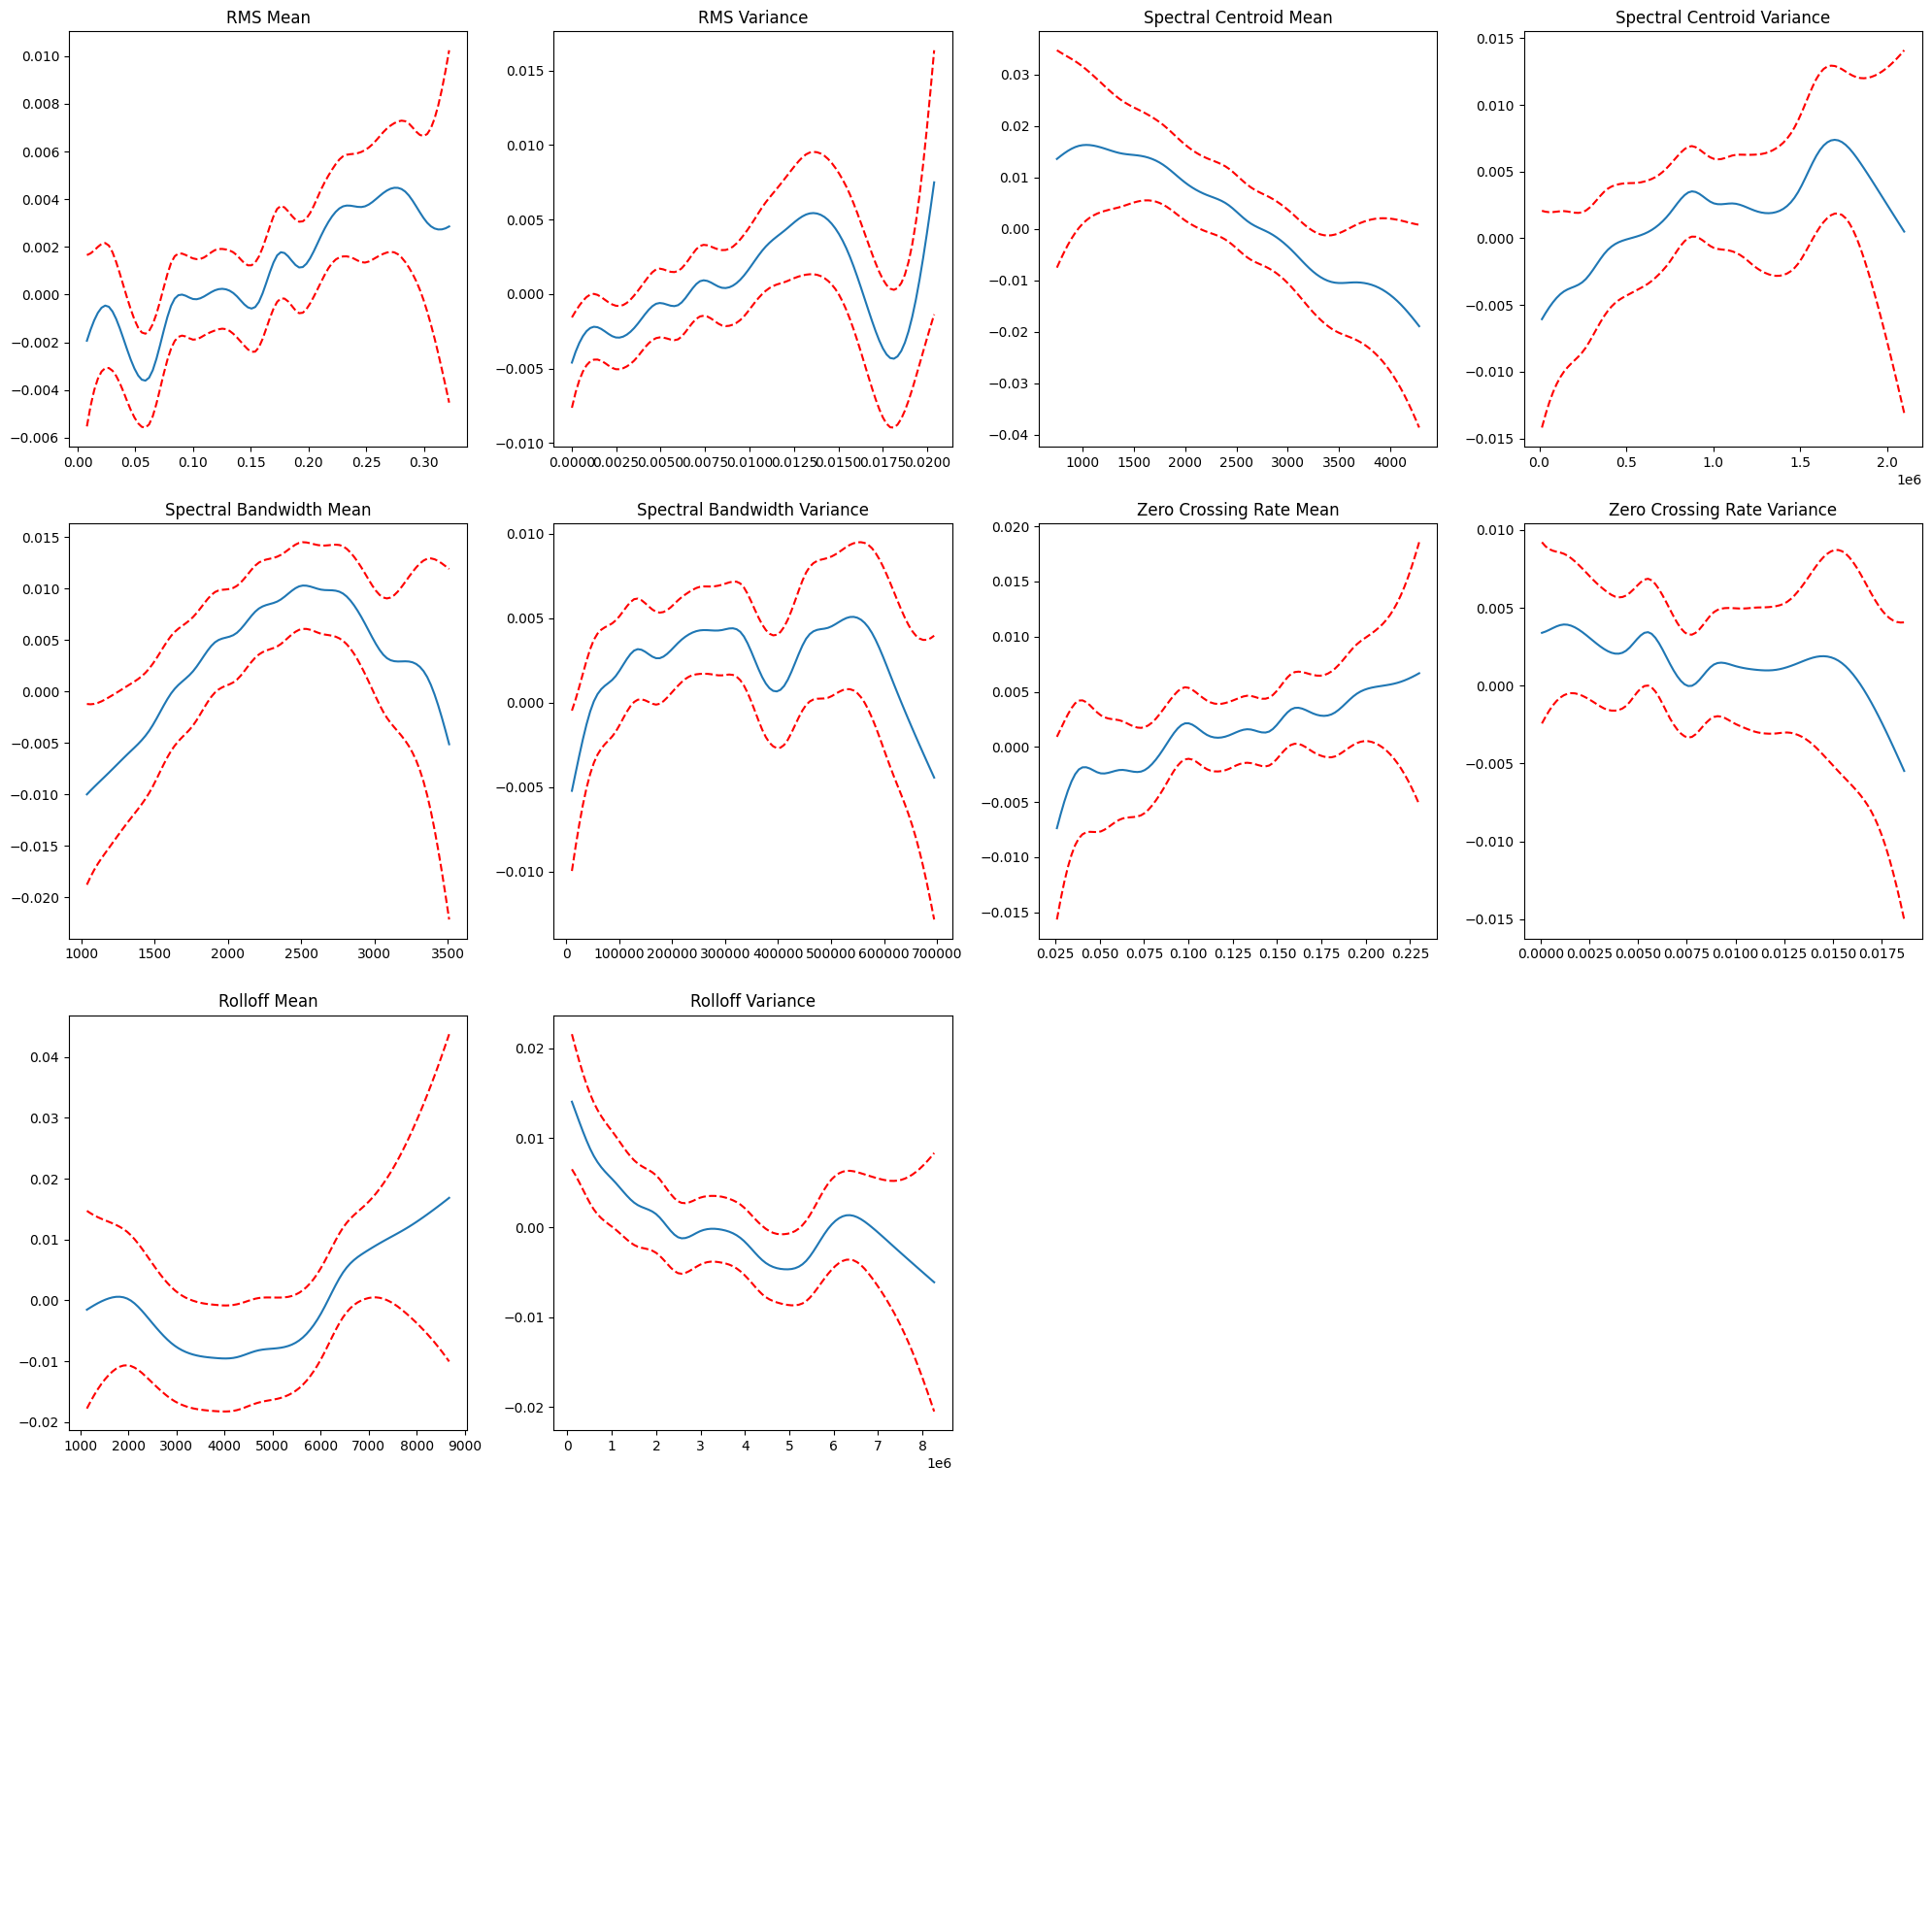

In [239]:
#plot the smooth functions for each predictor
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()
titles = [
    'RMS Mean', 'RMS Variance', 
    'Spectral Centroid Mean', 'Spectral Centroid Variance', 
    'Spectral Bandwidth Mean', 'Spectral Bandwidth Variance',
    'Zero Crossing Rate Mean', 'Zero Crossing Rate Variance',
    'Rolloff Mean', 'Rolloff Variance'
]

for i, ax in enumerate(axs):
    if i < len(X.columns):
        XX = gam.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
        ax.set_title(titles[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [240]:
#calculate MSE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gam.fit(X_train, y_train)


y_pred = gam.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 3.4345326395344506e-05


<h1>Other Figures</h1>

In [583]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df_long['Value'], df_long['Group'])
lsd_result = comp.tukeyhsd().summary()
print("\nFisher's LSD result:")
print(lsd_result)


In [584]:
fLSD_ids = fisherLSD_welch(welch_anova_results, 51)
print(fLSD_ids) 


5.105650237593573


In [ ]:
def compare_all_difs(names, means, lsd):
    total = []
    statistically_diff = []
    for i in range(len(names)):
        for j in range(i+1, len(names)):
            if abs(means[i] - means[j]) >= lsd:
                statistically_diff.append((names[i], names[j]))
            total.append((names[i], names[j]))
    return total, statistically_diff

In [ ]:
total, second_id_sig = compare_all_difs(avg_data510['song_name'], avg_data510['avg_total_water_loss'],fLSD_second_ids)
#print(second_id_sig) #print all statistically significant mean pairs

print(len(second_id_sig), len(total)) #print number of statistically significant mean pairs, and the total number of pairs
